# Decision Tree - classification
The goal of this exercise is to 
- learn how the decision tree classification algorithm works
  - how the tree splits and grows
  - to understand the quality of split
- how to train/test classification model
  - how to interpret the result

## References
- [Source: Scikit-DecisionTree](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)
- [Iris Classification](https://github.com/terryz1/Iris_Classification/blob/master/iris_classification.ipynb)
- https://github.com/Apress/mastering-ml-w-python-in-six-steps/blob/master/Chapter_3_Code/Code/Decision%20Trees.ipynb
  - Book - Mastering ML with Python in 6 steps

## Background

```{note}
- When a decision tree  
  - classifies things into categories
    - it's called Classification Tree
  - predicts numerical values
    - it's called Regression Tree
    

- In classification tree, features of different datatypes can be mixed together
  - exercise < 20 minutes 
    - classifies as True/False
  - eat doughnuts 
    - classifies as True/False
    

- numerical thresholds can be different for the same data
  - For example
    - 40 years or older
      - True
        - exercise < 20 minutes 
          - classifies further as True/False
      - False
        - exercise > 30 minutes 
          - classifies further as True/False
          
          
- how to choose optimal k
  - pick the columns which has the lowest impurity factor
  - the feature with lowest impurity takes the root position and same iterative process is repeated
    -  this is how quality is split is measured
    - supported methods in sklearn
      - Gini impurity and 
      - "entropy" for information gain.


- Gini Impurity is the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly labeled according to the class distribution in the dataset. 
  - If there are $C$ total classes and $p(i)$ is the probability of picking a datapoint with class i, then the Gini Impurity is calculated as
 
```

$$I_G(p) = \sum\limits_{i=1}^{J}\left(p_i\sum_{k \ne i} p_k \right) = \sum\limits_{i=1}^{J}p_i\left(1 - p_i \right) = \sum\limits_{i=1}^{J}\left(p_i - p^2_i \right) = \sum\limits_{i=1}^{J}p_i - \sum\limits_{i=1}^{J}p^2_i = 1 - \sum\limits_{i=1}^{J}p^2_i$$


## Sklearn imports

In [15]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

## Load dataset
## Split dataset
## Train model

In [10]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

clf2 = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Sklearn - tree structure

In [3]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 13 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 8.
		node=3 is a split node: go to node 4 if X[:, 3] <= 1.6500000357627869 else to node 5.
			node=4 is a leaf node.
			node=5 is a split node: go to node 6 if X[:, 1] <= 3.100000023841858 else to node 7.
				node=6 is a leaf node.
				node=7 is a leaf node.
		node=8 is a split node: go to node 9 if X[:, 2] <= 5.049999952316284 else to node 12.
			node=9 is a split node: go to node 10 if X[:, 1] <= 2.75 else to node 11.
				node=10 is a leaf node.
				node=11 is a leaf node.
			node=12 is a leaf node.


## Plot decision tree - use Gini

In [43]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf, filled = True)
# plt.savefig('./images/iris_decision_tree.png', dpi=100)
# plt.close()
# help(tree.plot_tree)
plt.show()

## Plot decision tree - Gini vs Entropy

In [48]:
clfs = [clf, clf2]
fig = plt.figure(figsize=(18,12)) 

for i in range(2):     
    ax = fig.add_subplot(1, 2, i+1)      
    tree.plot_tree(clfs[i], filled = True)
    ax.set_xticks([]); ax.set_yticks([]) 
ax.set_xticks([]); ax.set_yticks([])
fig.suptitle('Decision Tree - Gini vs Entropy')
# plt.savefig('./images/iris_decision_tree_comparison.png', dpi=100)
# plt.close()
plt.show()

## Evaluation Metrics

In [52]:
print(f"Train - Accuracy :\n {metrics.accuracy_score(y_train, clf.predict(X_train))}\n")
print(f"Train - Confusion matrix :\n {metrics.confusion_matrix(y_train, clf.predict(X_train))}\n")
print(f"Train - Classification report :\n {metrics.classification_report(y_train, clf.predict(X_train))}\n")

print(f"Test - Accuracy :\n {metrics.accuracy_score(y_test, clf.predict(X_test))}\n")
print(f"Test - Confusion matrix :\n {metrics.confusion_matrix(y_test, clf.predict(X_test))}\n")
print(f"Test - Classification report :\n {metrics.classification_report(y_test, clf.predict(X_test))}\n")


Train - Accuracy :
 1.0

Train - Confusion matrix :
 [[37  0  0]
 [ 0 34  0]
 [ 0  0 41]]

Train - Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        41

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112


Test - Accuracy :
 0.9736842105263158

Test - Confusion matrix :
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]

Test - Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.9

In [58]:
node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 0:

decision node 0 : (X_test[0, 3] = 2.4) > 0.800000011920929)
decision node 2 : (X_test[0, 2] = 5.1) > 4.950000047683716)
decision node 8 : (X_test[0, 2] = 5.1) > 5.049999952316284)


[Text(0.4, 0.9, 'X[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.7, 'X[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.2, 0.5, 'X[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'X[2] <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.3, 'X[0] <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

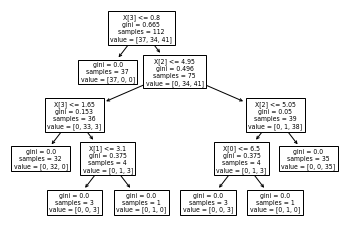

In [53]:
tree.plot_tree(clf)

## Confusion Matrix - display

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_, 
#                               display_labels=cm
                             )
disp.plot(cmap="Blues")
# plt.savefig('./images/iris_decision_tree_confusion_matrix.png', dpi=100)
# plt.close()
plt.show()

NameError: name 'clf' is not defined